In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
PROJECT_ROOT = Path().resolve()

while not (PROJECT_ROOT / "data").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

# Build correct file path
file_path = PROJECT_ROOT / "data" / "processed" / "nifty50_processed.csv"

In [4]:
df = pd.read_csv(file_path, low_memory=False)
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Stock
0,0,2010-01-04,55.718451,57.859506,55.183188,57.553642,1860224,ADANIENT.NS
1,1,2010-01-05,57.732052,59.127560,57.732052,58.885418,2280286,ADANIENT.NS
2,2,2010-01-06,59.006477,65.888437,58.624147,64.696838,7326390,ADANIENT.NS
3,3,2010-01-07,66.194331,66.194331,61.555372,62.026913,4759208,ADANIENT.NS
4,4,2010-01-08,62.421990,64.741473,61.453420,62.810696,3324076,ADANIENT.NS
...,...,...,...,...,...,...,...,...
177231,177231,2024-12-24,288.250678,289.844270,283.844884,286.188385,8837902,WIPRO.NS
177232,177232,2024-12-26,286.282136,287.735125,284.969781,285.954041,6516148,WIPRO.NS
177233,177233,2024-12-27,286.094662,291.437828,285.625962,289.750519,8063921,WIPRO.NS
177234,177234,2024-12-30,289.750526,290.031734,283.704280,284.688568,13709891,WIPRO.NS


In [5]:
stock = "RELIANCE.NS"

stock_df = df[df["Stock"] == stock].copy()
stock_df = stock_df.sort_values("Date")
stock_df = stock_df.set_index("Date")

stock_df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Stock
Date,,,,,,,
2010-01-04,134747,221.763734,221.763734,207.688828,218.593063,76646086,RELIANCE.NS
2010-01-05,134748,233.714740,233.714740,216.540283,217.617493,21392825,RELIANCE.NS
2010-01-06,134749,219.487367,222.454796,217.607324,221.133682,23691760,RELIANCE.NS
2010-01-07,134750,221.133693,226.621378,219.101204,224.802307,26197920,RELIANCE.NS
2010-01-08,134751,225.198627,226.377471,222.759654,224.212875,15110149,RELIANCE.NS


In [6]:
stock_df["SMA_20"] = stock_df["Close"].rolling(window=20).mean()
stock_df["SMA_50"] = stock_df["Close"].rolling(window=50).mean()


In [7]:
stock_df["Returns"] = stock_df["Close"].pct_change()


In [8]:
stock_df["Volatility_20"] = stock_df["Returns"].rolling(20).std()


In [9]:
window = 14

delta = stock_df["Close"].diff()

gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()

rs = avg_gain / avg_loss
stock_df["RSI_14"] = 100 - (100 / (1 + rs))


In [10]:
stock_df = stock_df.dropna()
stock_df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Stock,SMA_20,SMA_50,Returns,Volatility_20,RSI_14
Date,,,,,,,,,,,,
2010-03-17,134796,218.450838,220.015843,216.621605,217.414276,21599472,RELIANCE.NS,204.532919,210.169285,0.001639,0.017961,73.770908
2010-03-18,134797,218.288270,219.832951,216.276119,218.887848,15292424,RELIANCE.NS,204.984132,210.175180,0.006778,0.017773,81.149170
2010-03-19,134798,219.263824,222.861304,217.505726,221.956863,19737747,RELIANCE.NS,205.941938,210.261968,0.014021,0.015790,81.071458
2010-03-22,134799,215.849235,223.369395,215.849235,218.278046,20468483,RELIANCE.NS,206.864175,210.204855,-0.016574,0.015920,73.168221
2010-03-23,134800,219.091080,222.343049,218.887838,221.824768,20005544,RELIANCE.NS,208.017102,210.145304,0.016249,0.015946,69.394278


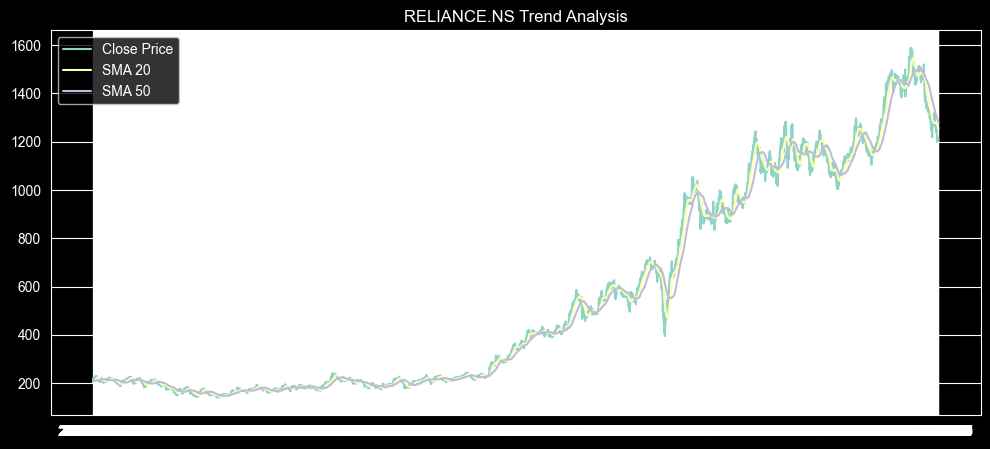

In [11]:
plt.figure(figsize=(12,5))
plt.plot(stock_df["Close"], label="Close Price")
plt.plot(stock_df["SMA_20"], label="SMA 20")
plt.plot(stock_df["SMA_50"], label="SMA 50")
plt.legend()
plt.title(f"{stock} Trend Analysis")
plt.show()


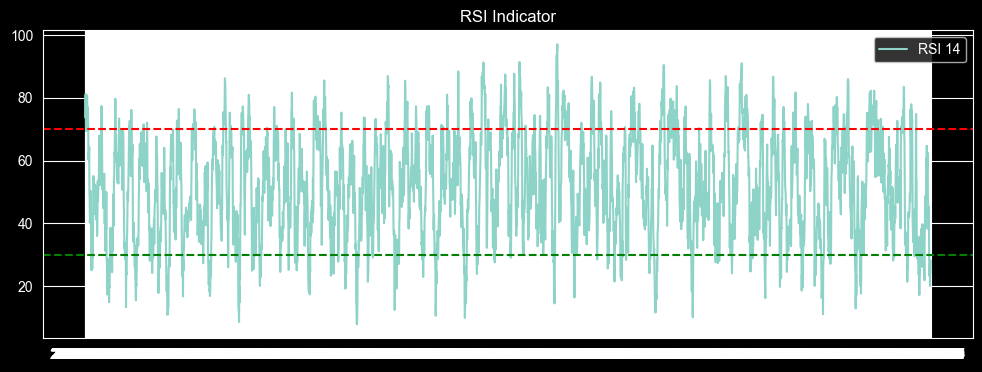

In [12]:
plt.figure(figsize=(12,4))
plt.plot(stock_df["RSI_14"], label="RSI 14")
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI Indicator")
plt.legend()
plt.show()


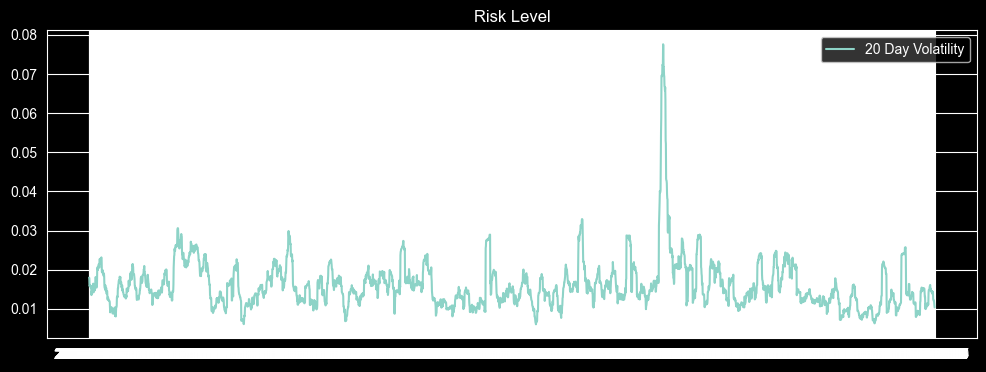

In [13]:
plt.figure(figsize=(12,4))
plt.plot(stock_df["Volatility_20"], label="20 Day Volatility")
plt.title("Risk Level")
plt.legend()
plt.show()
